In [1]:
import yt
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3/object


In [3]:
def plot_all(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    slc.annotate_grids()
    slc.set_cmap("all","rainbow")
    slc.show()

    physical_quantity="pressure"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
    slc.set_log("all", False)
    # slc.set_zlim(physical_quantity,58,60)
    slc.show()

    physical_quantity="temperature"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
    # slc.set_log("all", False)
    # slc.set_zlim(physical_quantity,58,60)
    slc.show()


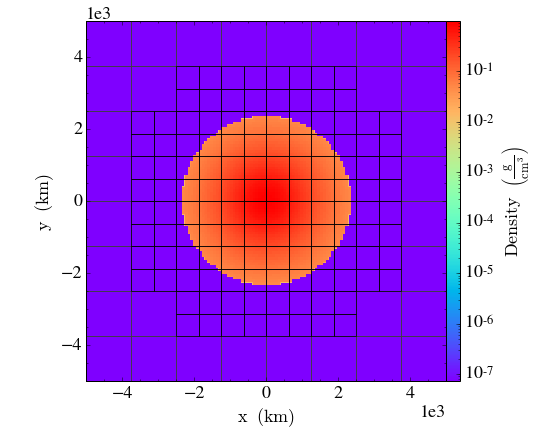


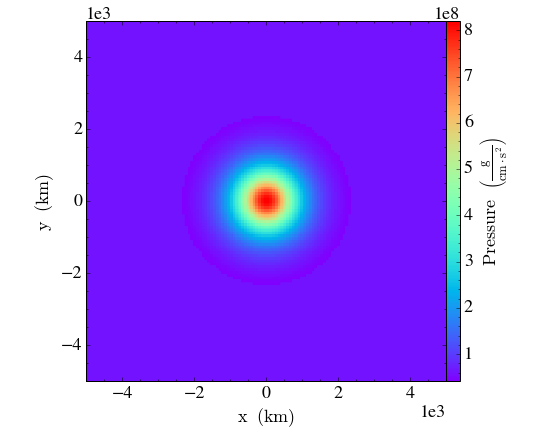

In [4]:
plot_all(0)

In [3]:
def plot_dens(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    slc.annotate_grids()
    slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    slc.show()


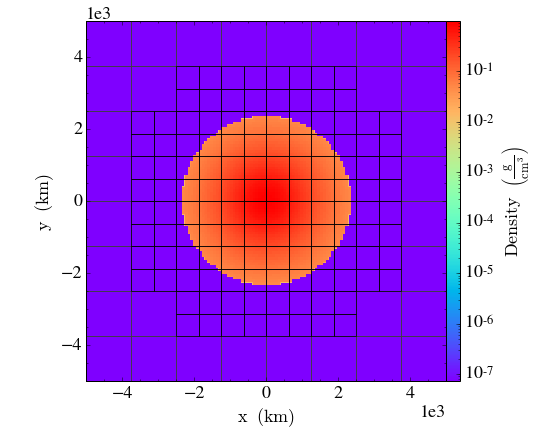


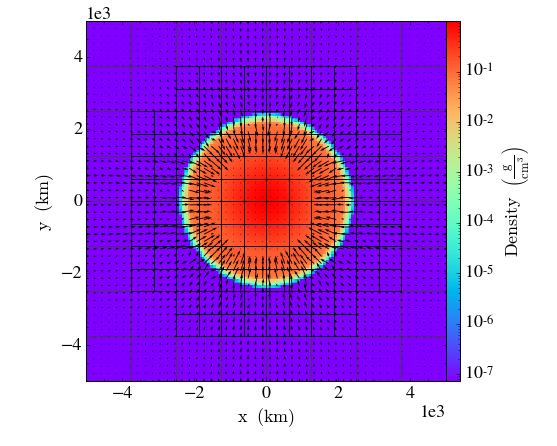


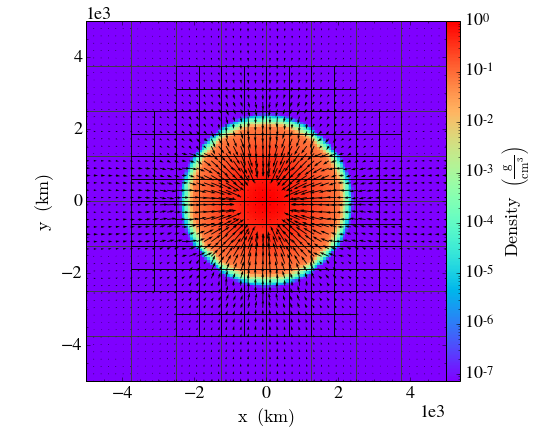


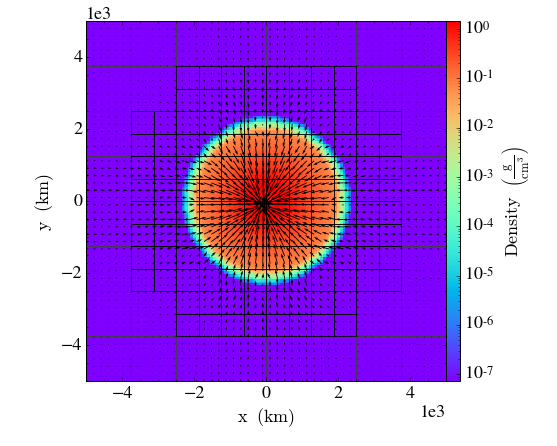


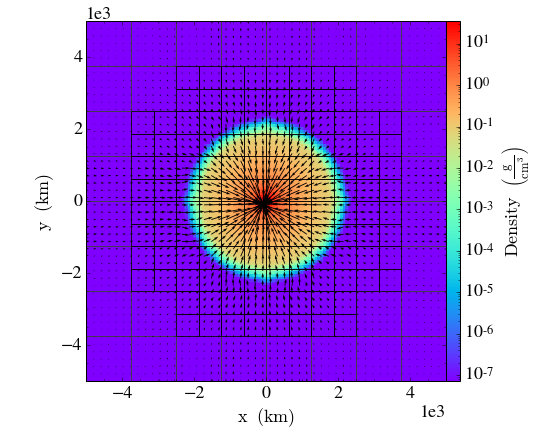


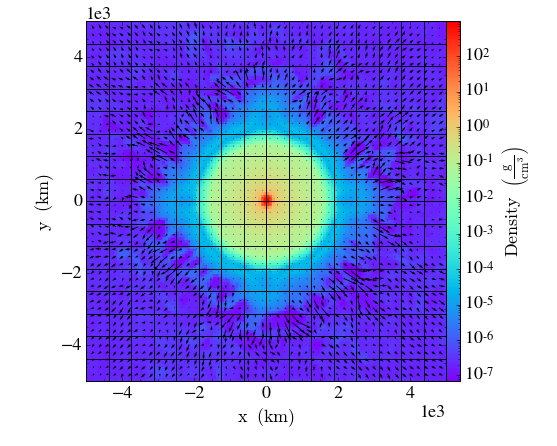

In [8]:
for i in np.arange(103):
    if i%20 ==0 or i==0:
        plot_dens(i)


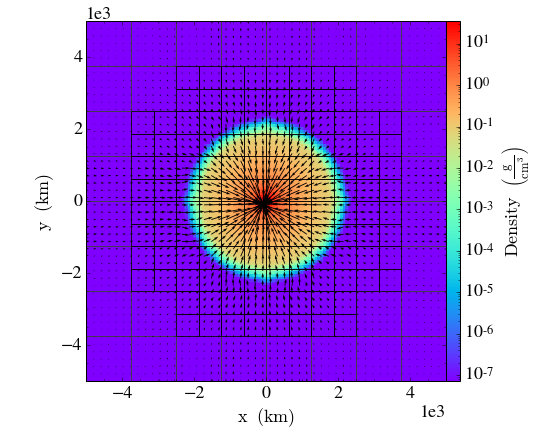


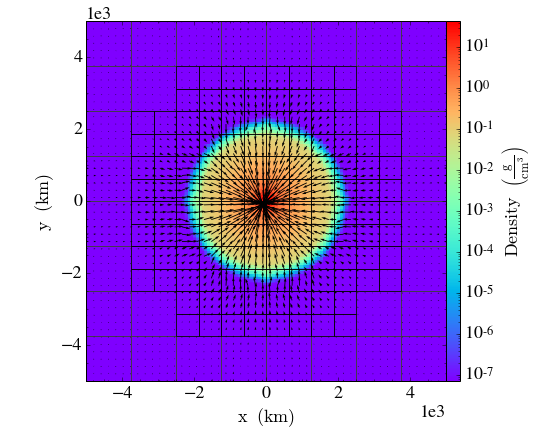


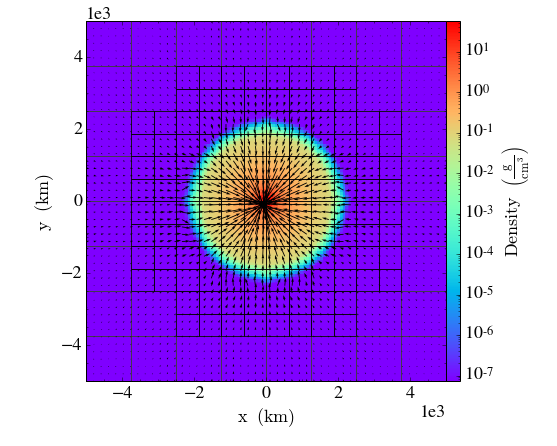


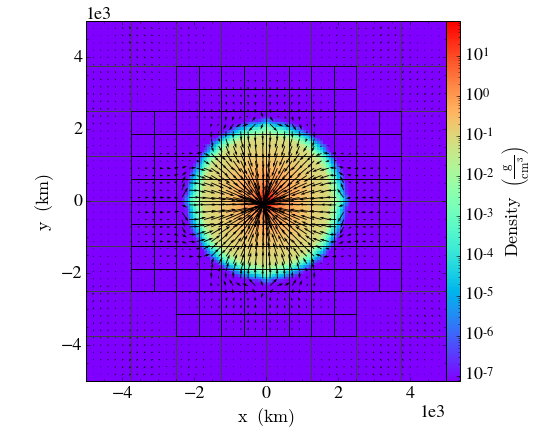


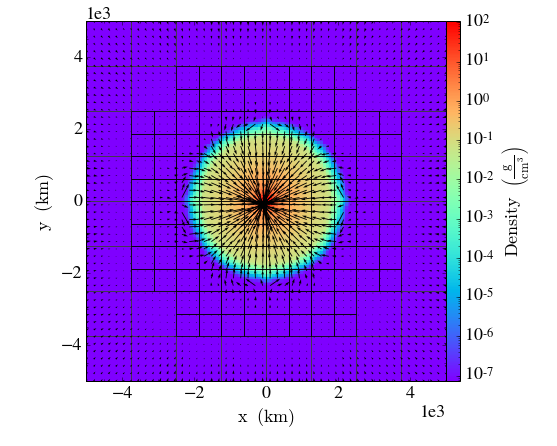


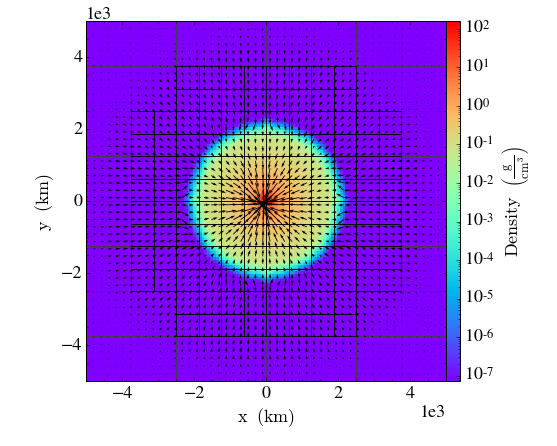


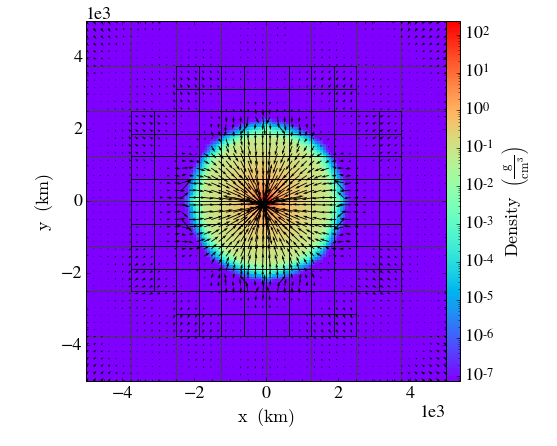


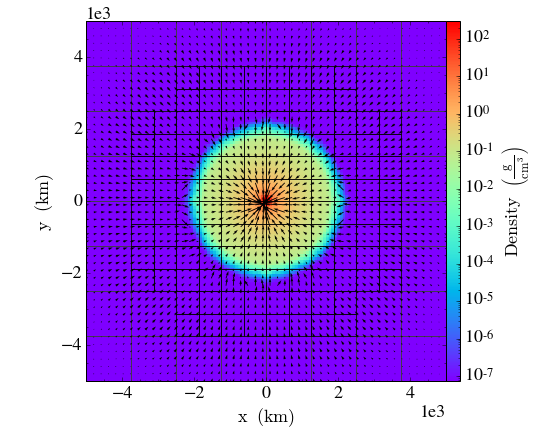


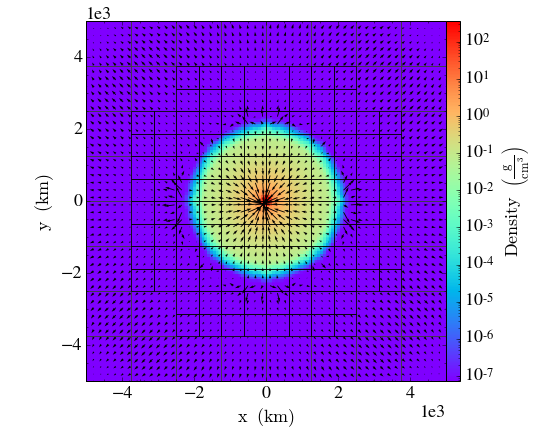


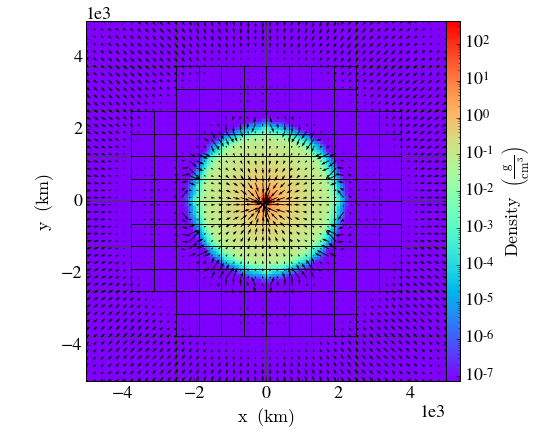


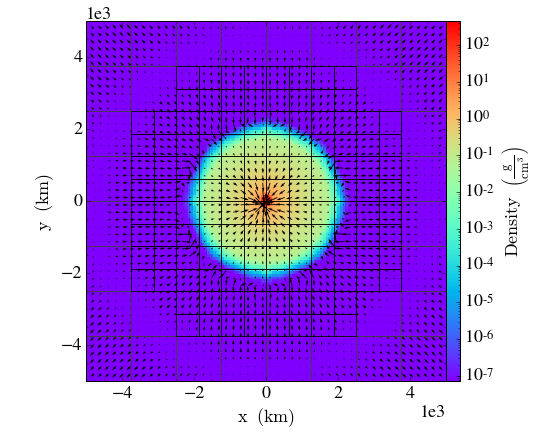


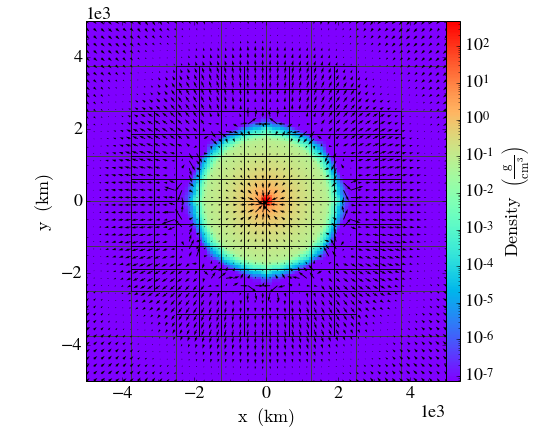


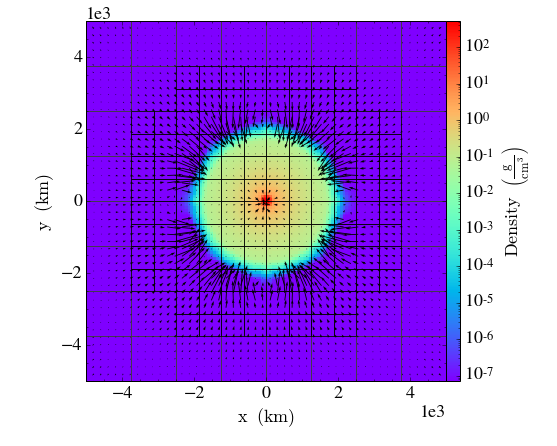


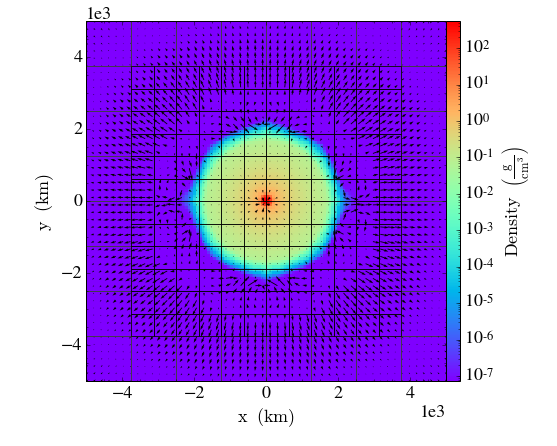


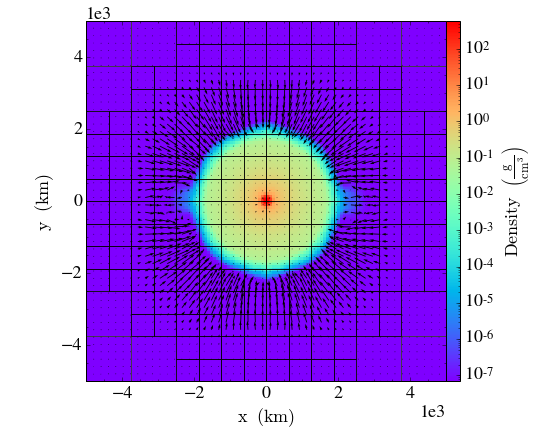


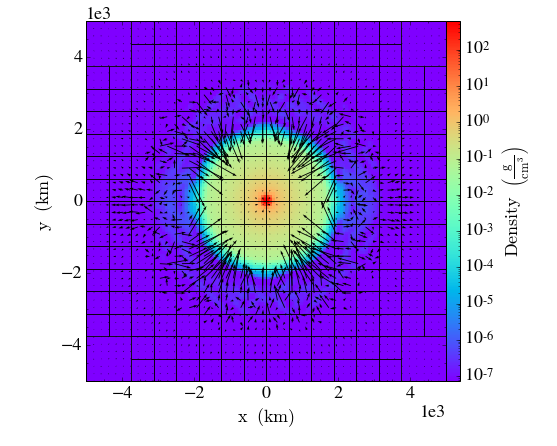


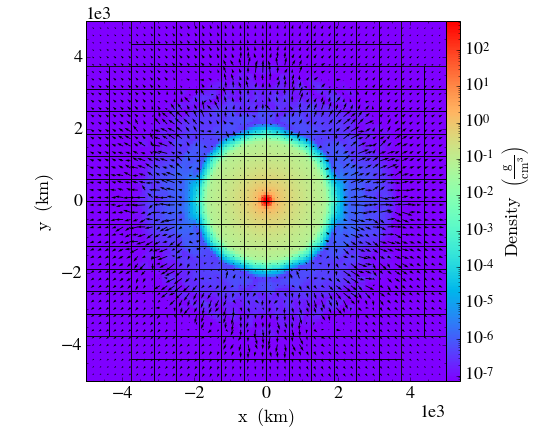


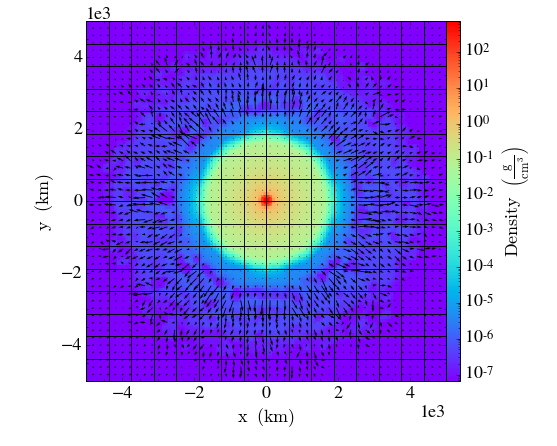


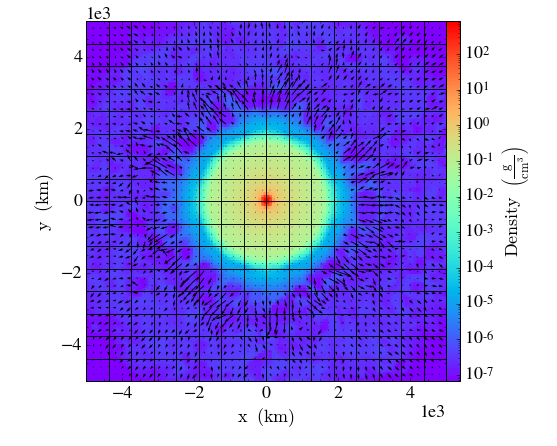


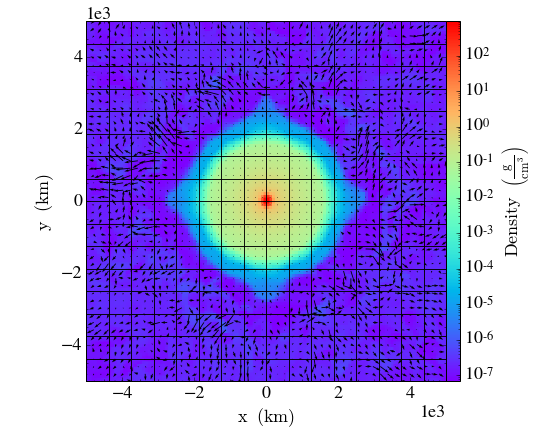


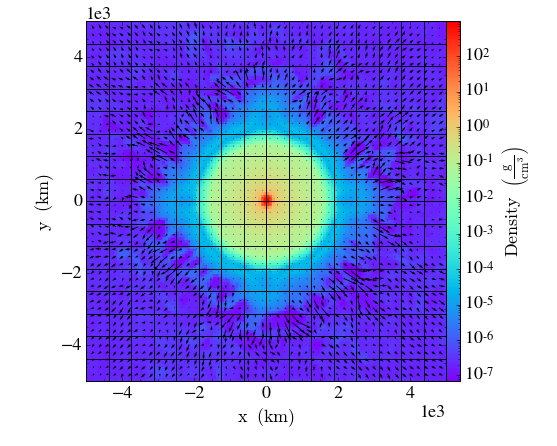


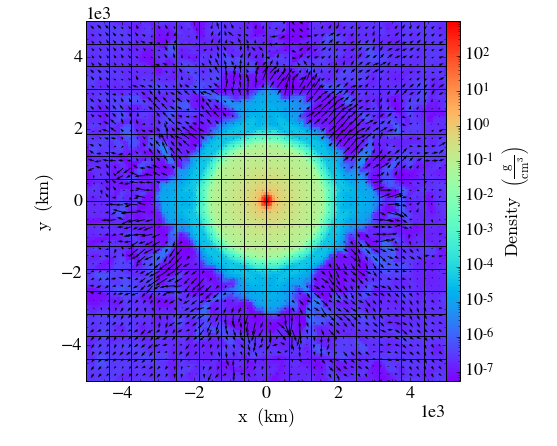


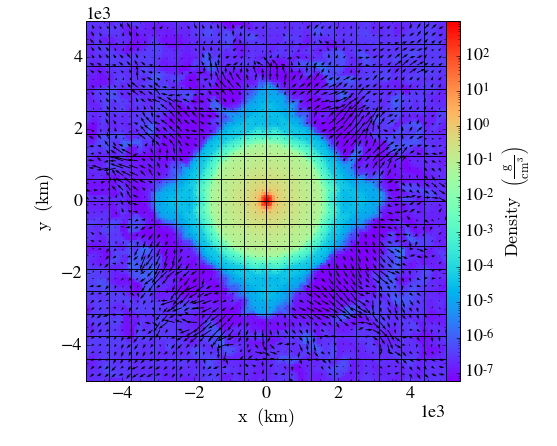


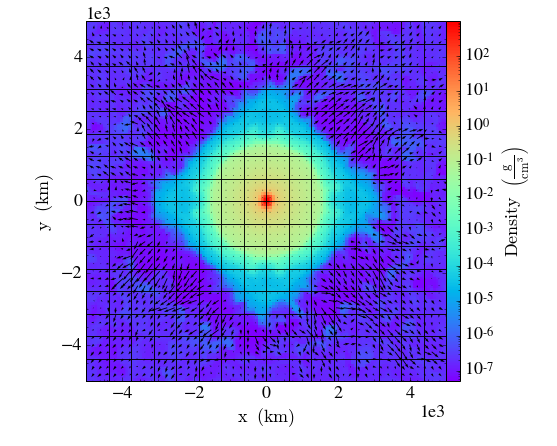

In [12]:
for i in np.arange(80,104):
    plot_dens(i)

In [3]:
from yt.units import second, g, cm ,dyne
G = 6.674e-8*cm**3/second**2/g
rho_c = 1.0*g/cm**3
conversion = sqrt(4*pi*G*rho_c)
aT  = 28730*cm/second # for 10K gas 
def _norm_r(field,data):
    return data["radius"]*conversion/aT
def _norm_v(field,data):
    return data["radial_velocity"]/aT
def _norm_d(field,data):
    return data["density"]/rho_c

In [4]:
# yt.add_field("norm_t",function= _norm_t,units="")
yt.add_field("norm_r",function= _norm_r,units="")
yt.add_field("norm_v",function= _norm_v,units="")
yt.add_field("norm_d",function= _norm_d,units="")

In [5]:
i=10
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
data = ds.all_data()

In [7]:
print data["norm_r"]
print data["norm_v"]
print data["norm_d"]

[ 27.17400271  26.88952241  26.61132347 ...,  26.61132347  26.88952241
  27.17400271] dimensionless
[ -2.30849906e-05   1.33969852e-05  -8.19655271e-05 ...,  -8.13823309e-05
   1.43561488e-05  -2.26121248e-05] dimensionless
[  7.25919181e-08   7.25919208e-08   7.25919254e-08 ...,   7.25919254e-08
   7.25919208e-08   7.25919180e-08] dimensionless


checkpoint files are written every 100 seconds 

In [8]:
def compute_tau(i,round=5):
    return str(i*100*second*conversion)[:round]

In [9]:
def plot_radial_profile(physical_quantity,i,log="loglog"):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    c = ds.find_max(physical_quantity)[1]
    ax = 0 # Cut through x axis
    # cutting through the y0,z0 such that we hit the max density
    ray = ds.ortho_ray(ax, (c[1], c[2]))
    srt = np.argsort(ray['norm_r'])
    plt.xlabel("log xi",fontsize=13)
    if log =="loglog":
        plt.loglog(np.array(ray['norm_r'][srt]), np.array(ray[physical_quantity][srt]),label="tau = {}".format(compute_tau(i)))
        plt.ylabel('log {}'.format(physical_quantity),fontsize=13)
    elif log=="logy":
        plt.semilogx(np.array(ray['norm_r'][srt]), np.array(ray[physical_quantity][srt]),label="tau = {}".format(compute_tau(i)))
        plt.ylabel('{}'.format(physical_quantity),fontsize=13)    

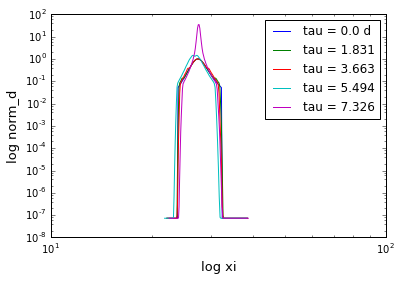

In [10]:
plt.figure()
# plt.subplot(211)
for i in np.arange(100):
    if i%20 ==0 or i==0:
        plot_radial_profile('norm_d',i)
plt.legend()

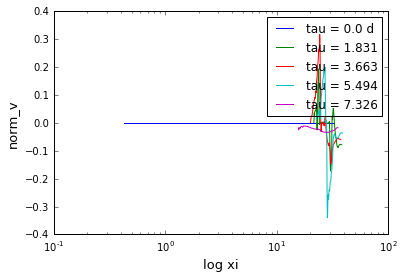

In [11]:
plt.figure()
# plt.subplot(211)
for i in np.arange(100):
    if i%20 ==0 or i==0:
        plot_radial_profile('norm_v',i,log="logy")
plt.legend()

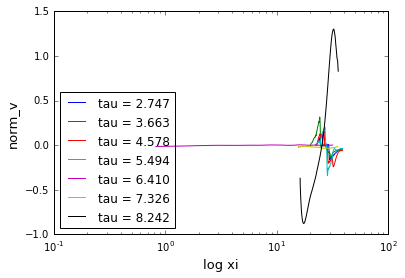

In [14]:
plt.figure()
for i in np.arange(100):
    if i in [30,40,50,60,70,80,90]:
        plot_radial_profile('norm_v',i,log="logy")
plt.legend(loc="lower left")

In [15]:
plt.figure()
for i in np.arange(100):
    if i in [30,40,50,60,70,80]:
        plot_radial_profile('norm_v',i,log="logy")
plt.legend(loc="lower left")

In [16]:
plt.figure()
for i in np.arange(100):
    if i in [30,40,50,60]:
        plot_radial_profile('norm_v',i,log="logy")
plt.legend(loc="lower left")

In [23]:
ds.derived_field_list

[('flash', u'dens'),
 ('flash', u'eint'),
 ('flash', u'ener'),
 ('flash', u'gamc'),
 ('flash', u'game'),
 ('flash', u'gpol'),
 ('flash', u'gpot'),
 ('flash', u'pres'),
 ('flash', u'temp'),
 ('flash', u'velx'),
 ('flash', u'vely'),
 ('flash', u'velz'),
 ('gas', 'H_nuclei_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'cylindrical_radial_velocity'),
 ('gas', 'cylindrical_radial_velocity_absolute'),
 ('gas', 'cylindrical_tangential_velocity'),
 ('gas', 'cylindrical_tangential_velocity_absolute'),
 ('gas', 'd

In [24]:
sqrt(data["x"]**2+data["y"]**2+ data["z"]**2)

YTArray([  1.35316469e+07,   2.59111312e+07,   4.05949408e+07, ...,
         1.70066838e+09,   1.70954567e+09,   1.71851916e+09]) code_length

In [25]:
data["radius"]

YTArray([  8.52493757e+08,   8.43569136e+08,   8.34841571e+08, ...,
         8.34841571e+08,   8.43569136e+08,   8.52493757e+08]) cm

In [26]:
data['cylindrical_radius']

YTArray([  6.96058238e+08,   6.96058238e+08,   6.96058238e+08, ...,
         6.96058238e+08,   6.96058238e+08,   6.96058238e+08]) cm

In [27]:
data['cylindrical_r']

YTArray([  6.96058238e+08,   6.96058238e+08,   6.96058238e+08, ...,
         6.96058238e+08,   6.96058238e+08,   6.96058238e+08]) cm

In [28]:
data['spherical_radius']

YTArray([  8.52493757e+08,   8.43569136e+08,   8.34841571e+08, ...,
         8.34841571e+08,   8.43569136e+08,   8.52493757e+08]) cm

So it looks like spherical_radius = spherical_r = radius, but it doesn't seem to be equal to the Cartesian radius that I'm thinking about. Maybe I need to do (x-center)**2 instead?? 